
PHÂN TÍCH THỐNG KÊ DỮ LIỆU THỜI TIẾT

In [24]:
import pandas as pd

# --- Đọc dữ liệu ---
weather = pd.read_csv("weather_cleaned.csv", parse_dates=["Datetime"])

# --- Thông tin tổng quát ---
print("="*60)
print("TỆP: WEATHER_CLEANED.CSV")
print("="*60)
print(f"- Số dòng: {weather.shape[0]}")
print(f"- Số cột: {weather.shape[1]}")

if "Datetime" in weather.columns:
    print(f"- Khoảng thời gian: {weather['Datetime'].min()} → {weather['Datetime'].max()}")

print("\n Kiểu dữ liệu từng cột:")
print(weather.dtypes)

print("\n Số lượng giá trị bị thiếu:")
print(weather.isna().sum())

print("\n Số lượng giá trị duy nhất:")
print(weather.nunique())

# --- Thống kê mô tả chi tiết ---
print("\nThống kê mô tả chi tiết:")
try:
    # Nếu pandas mới (>=1.5.0)
    print(weather.describe(datetime_is_numeric=True, include="all").T)
except TypeError:
    # Nếu pandas cũ (chưa có datetime_is_numeric)
    print(weather.describe(include="all").T)


# --- Phân tích chi tiết từng cột số ---
num_cols = weather.select_dtypes(include="number").columns
print("\nPhân tích chi tiết các cột số:")
for col in num_cols:
    print(f"\nCột: {col}")
    print(f"  → Mean (Trung bình): {weather[col].mean():,.2f}")
    print(f"  → Median (Trung vị): {weather[col].median():,.2f}")
    print(f"  → Min (Nhỏ nhất): {weather[col].min():,.2f}")
    print(f"  → Max (Lớn nhất): {weather[col].max():,.2f}")
    print(f"  → Std (Độ lệch chuẩn): {weather[col].std():,.2f}")


TỆP: WEATHER_CLEANED.CSV
- Số dòng: 2208
- Số cột: 8
- Khoảng thời gian: 2025-06-01 00:00:00 → 2025-08-31 23:00:00

 Kiểu dữ liệu từng cột:
Datetime         datetime64[ns]
Temperature             float64
Humidity                  int64
Precipitation           float64
WindSpeed               float64
WindDirection             int64
Pressure                float64
CloudCover                int64
dtype: object

 Số lượng giá trị bị thiếu:
Datetime         0
Temperature      0
Humidity         0
Precipitation    0
WindSpeed        0
WindDirection    0
Pressure         0
CloudCover       0
dtype: int64

 Số lượng giá trị duy nhất:
Datetime         2208
Temperature       111
Humidity           48
Precipitation      91
WindSpeed         204
WindDirection     279
Pressure           96
CloudCover         98
dtype: int64

Thống kê mô tả chi tiết:
                count                 mean                  min  \
Datetime         2208  2025-07-16 23:30:00  2025-06-01 00:00:00   
Temperature    220

=== Xử lý dữ liệu ===

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc và xử lý dữ liệu
weather = pd.read_csv("weather_cleaned.csv", parse_dates=["Datetime"])
weather = weather.set_index("Datetime").sort_index()

# Tạo dữ liệu theo ngày
daily = weather.resample("D").agg({
    "Temperature": ["mean","min","max"],
    "Humidity": "mean",
    "Precipitation": "sum",
    "WindSpeed": "mean",
    "Pressure": "mean",
    "CloudCover": "mean"
})
daily.columns = ["Temp_mean","Temp_min","Temp_max","Humidity","Precip","WindSpeed","Pressure","Cloud"]
daily["TempRange"] = daily["Temp_max"] - daily["Temp_min"]


=== Biểu đồ xu hướng nhiệt độ trung bình, min, max ===

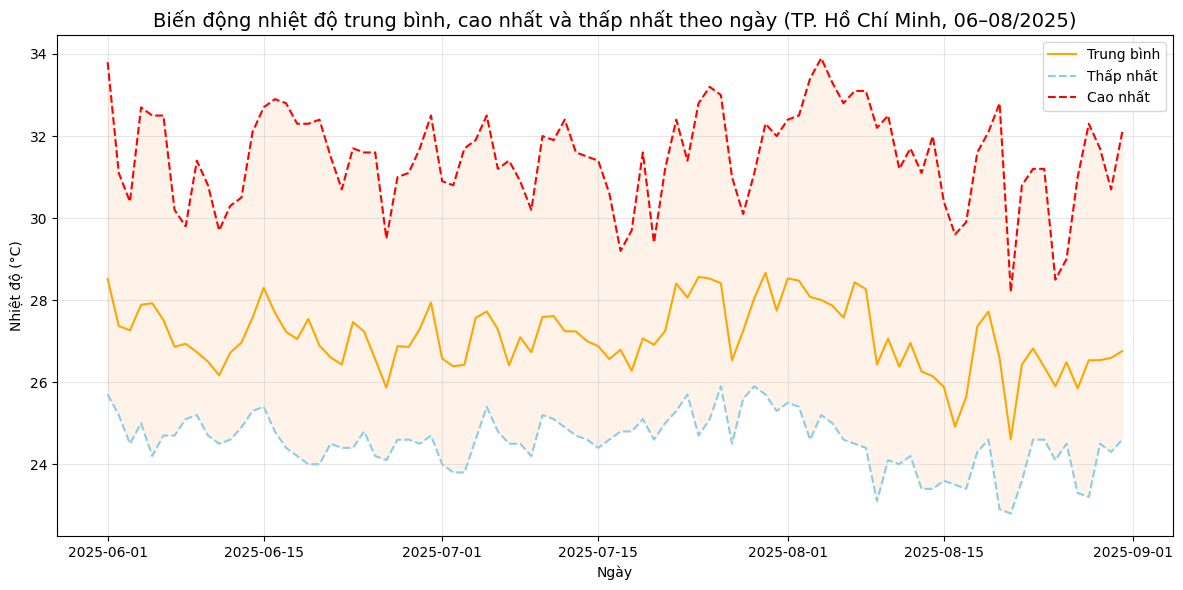

In [17]:
plt.figure(figsize=(12,6))
plt.plot(daily.index, daily["Temp_mean"], color="orange", label="Trung bình")
plt.plot(daily.index, daily["Temp_min"], color="skyblue", linestyle="--", label="Thấp nhất")
plt.plot(daily.index, daily["Temp_max"], color="red", linestyle="--", label="Cao nhất")
plt.fill_between(daily.index, daily["Temp_min"], daily["Temp_max"], color="peachpuff", alpha=0.3)
plt.title("Biến động nhiệt độ trung bình, cao nhất và thấp nhất theo ngày (TP. Hồ Chí Minh, 06–08/2025)", fontsize=14)
plt.xlabel("Ngày"); plt.ylabel("Nhiệt độ (°C)")
plt.legend(); plt.grid(alpha=0.3)
plt.tight_layout(); plt.show()


Biểu đồ thể hiện xu hướng nhiệt độ tại TP. Hồ Chí Minh trong giai đoạn 06–08/2025. Nhiệt độ cao nhất thường dao động quanh 30–33°C, thấp nhất khoảng 22-24°C, và trung bình ở mức 27–28°C. Khoảng chênh lệch giữa nhiệt độ cao nhất và thấp nhất nhìn chung ổn định, cho thấy khí hậu ít biến động mạnh theo ngày. Giai đoạn cuối tháng 7 đến tháng 8 có xu hướng nhiệt độ tăng nhẹ, phản ánh hiện tượng nắng xen mưa thường thấy trong mùa mưa ở khu vực Nam Bộ.

=== Biểu đồ phân bố (Histogram) – Nhiệt độ & Độ ẩm ===

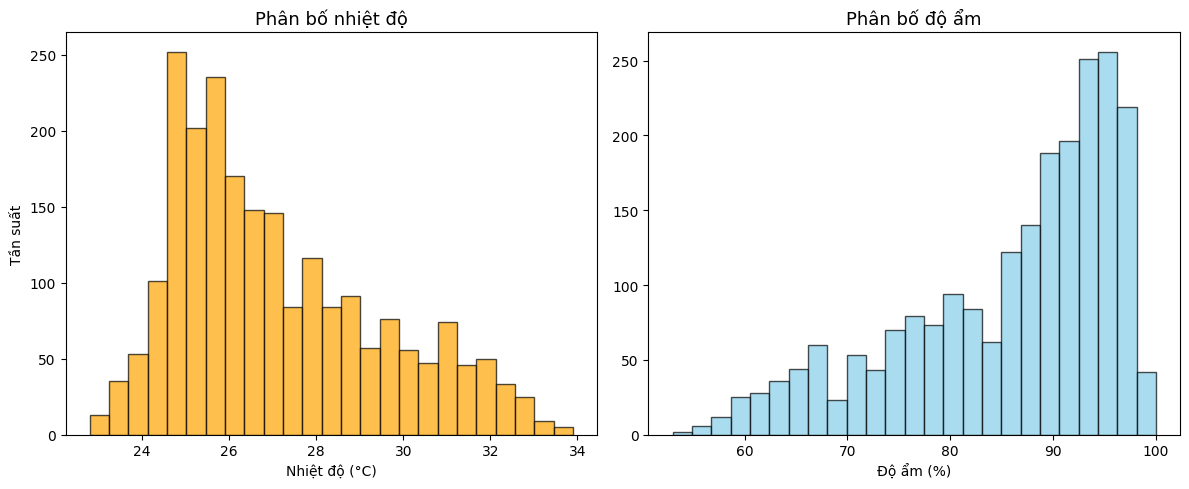

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
axes[0].hist(weather["Temperature"], bins=25, color="orange", edgecolor="black", alpha=0.7)
axes[0].set_title("Phân bố nhiệt độ", fontsize=13)
axes[0].set_xlabel("Nhiệt độ (°C)"); axes[0].set_ylabel("Tần suất")

axes[1].hist(weather["Humidity"], bins=25, color="skyblue", edgecolor="black", alpha=0.7)
axes[1].set_title("Phân bố độ ẩm", fontsize=13)
axes[1].set_xlabel("Độ ẩm (%)")

plt.tight_layout(); plt.show()


### Phân tích biểu đồ phân bố nhiệt độ
Biểu đồ cho thấy nhiệt độ tại TP. Hồ Chí Minh trong giai đoạn 06–08/2025 chủ yếu tập trung trong khoảng 25–30°C, với đỉnh tần suất rơi vào khoảng 26–27°C.  
Phân bố có dạng lệch phải, nghĩa là phần lớn các ngày có nhiệt độ trung bình – mát, trong khi chỉ có một số ít ngày rất nóng vượt trên 32°C.  
Điều này phản ánh đặc trưng khí hậu ổn định của TP.HCM vào mùa mưa, khi mây nhiều và nhiệt độ không biến động mạnh.  
=> Kết luận: Khí hậu giai đoạn này duy trì ổn định, chủ yếu ở mức ấm và dễ chịu, ít xuất hiện các đợt nắng nóng cực đoan.

### Phân tích biểu đồ phân bố độ ẩm
Biểu đồ thể hiện độ ẩm tại TP. Hồ Chí Minh phân bố lệch trái, với phần lớn giá trị nằm trong khoảng 80–100%.  
Điều này chứng tỏ không khí luôn duy trì độ ẩm cao, đặc trưng của mùa mưa nhiệt đới.  
Số lần xuất hiện độ ẩm thấp dưới 70% rất ít, chỉ xảy ra trong vài ngày có nắng gắt hoặc gió mạnh.  
Độ ẩm cao như vậy khiến cảm giác thời tiết thường oi bức và ngột ngạt, dù nhiệt độ không quá cao.  
=> Kết luận: Độ ẩm duy trì ở mức cao cho thấy điều kiện khí hậu TP.HCM giai đoạn này mang tính ẩm ướt, mưa nhiều và ít ngày khô ráo.

=== Biểu đồ tương quan giữa nhiệt độ và độ ẩm ===

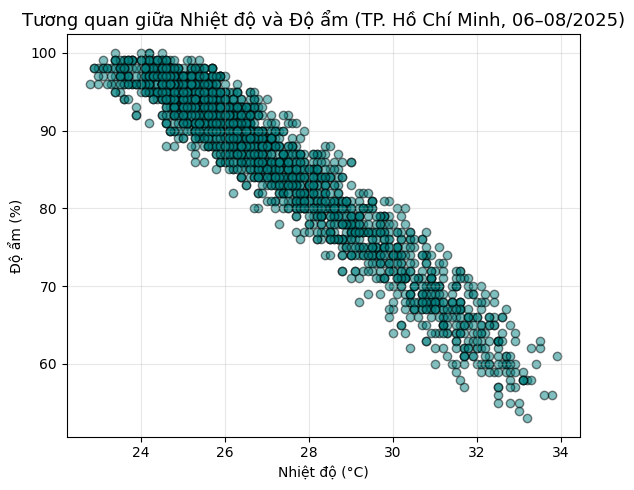

In [18]:
plt.figure(figsize=(6,5))
plt.scatter(weather["Temperature"], weather["Humidity"], alpha=0.5, color="teal", edgecolor="black")
plt.title("Tương quan giữa Nhiệt độ và Độ ẩm (TP. Hồ Chí Minh, 06–08/2025)", fontsize=13)
plt.xlabel("Nhiệt độ (°C)"); plt.ylabel("Độ ẩm (%)")
plt.grid(alpha=0.3)
plt.tight_layout(); plt.show()


Biểu đồ phân tán cho thấy mối tương quan nghịch rõ rệt giữa nhiệt độ và độ ẩm tại TP. Hồ Chí Minh. Khi nhiệt độ tăng, độ ẩm có xu hướng giảm mạnh, thể hiện qua các điểm dữ liệu tập trung theo đường dốc xuống. Mối tương quan này phản ánh đặc trưng khí hậu nhiệt đới: thời tiết nóng hơn thường kèm không khí khô hơn do hơi nước bốc hơi nhanh. Ngược lại, những ngày có độ ẩm cao thường đi kèm với nhiệt độ thấp do mưa hoặc nhiều mây che phủ.

=== Biểu đồ tương quan giữa Lượng mưa và nhiệt độ trung bình ===

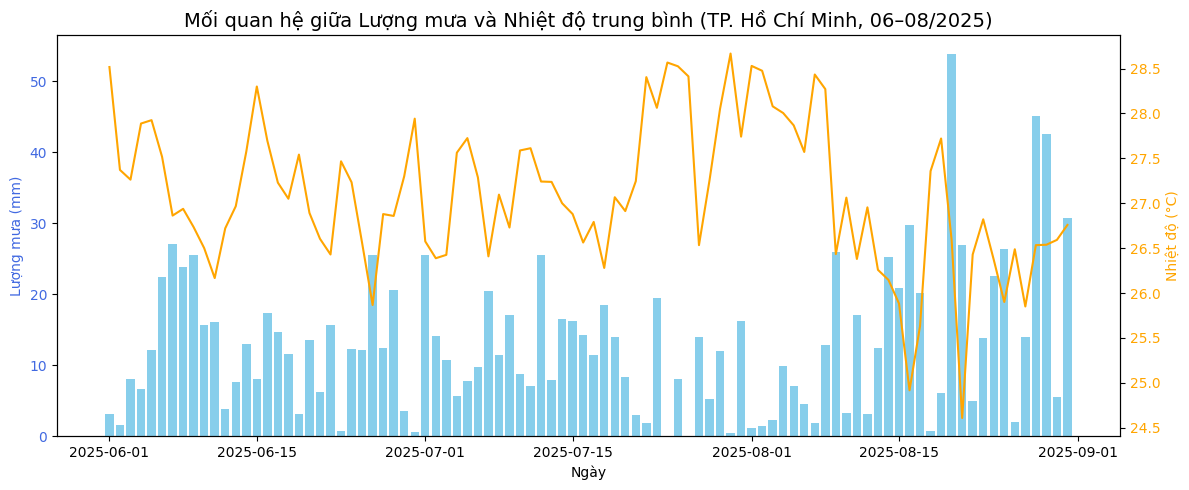

In [19]:
fig, ax1 = plt.subplots(figsize=(12,5))

ax1.set_xlabel("Ngày")
ax1.set_ylabel("Lượng mưa (mm)", color="royalblue")
ax1.bar(daily.index, daily["Precip"], color="skyblue", label="Lượng mưa (mm)")
ax1.tick_params(axis='y', labelcolor="royalblue")

ax2 = ax1.twinx()
ax2.plot(daily.index, daily["Temp_mean"], color="orange", label="Nhiệt độ TB (°C)")
ax2.set_ylabel("Nhiệt độ (°C)", color="orange")
ax2.tick_params(axis='y', labelcolor="orange")

plt.title("Mối quan hệ giữa Lượng mưa và Nhiệt độ trung bình (TP. Hồ Chí Minh, 06–08/2025)", fontsize=14)
fig.tight_layout()
plt.show()


Biểu đồ kết hợp dạng cột và đường biểu diễn mối quan hệ giữa lượng mưa (cột xanh) và nhiệt độ trung bình (đường cam). Dễ thấy rằng vào những ngày có lượng mưa lớn, nhiệt độ trung bình thường giảm nhẹ, còn khi mưa ít hoặc không mưa, nhiệt độ tăng cao hơn. Hiện tượng này phản ánh cơ chế tự nhiên của quá trình đối lưu và bay hơi: mưa giúp giảm nhiệt độ bề mặt và làm mát không khí. Giai đoạn giữa tháng 6 và giữa tháng 8 có nhiều đợt mưa lớn đi kèm nhiệt độ giảm rõ rệt.

=== Biểu đồ tương quan giữa độ ẩm và lượng mưa ===

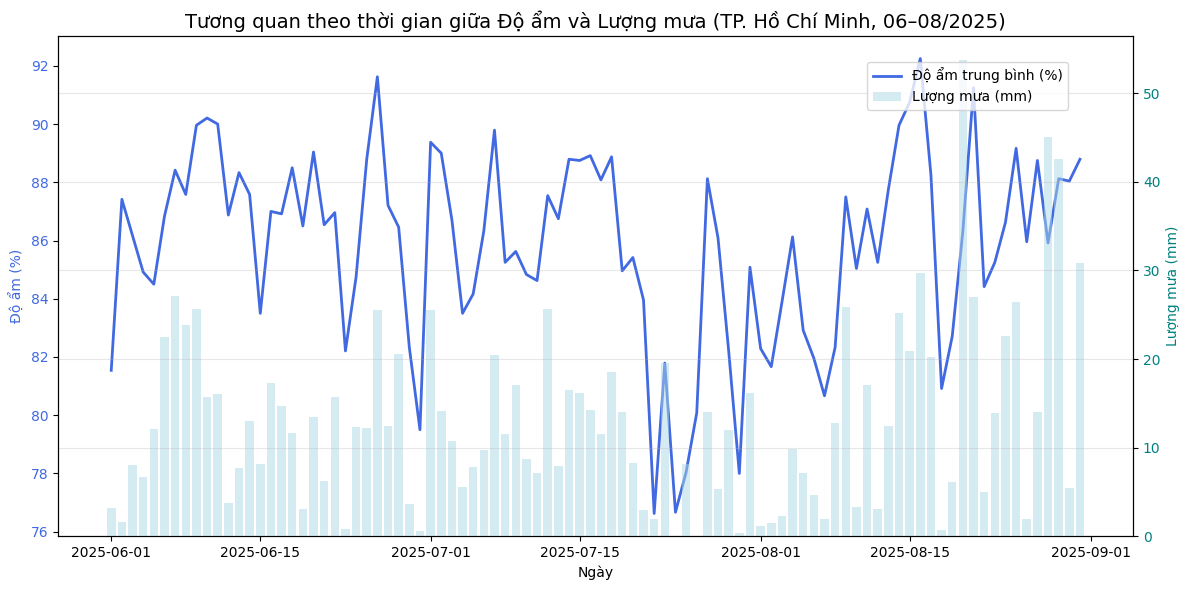

In [16]:
fig, ax1 = plt.subplots(figsize=(12,6))

# Trục trái: độ ẩm
ax1.plot(daily.index, daily["Humidity"], color="royalblue", label="Độ ẩm trung bình (%)", linewidth=2)
ax1.set_xlabel("Ngày")
ax1.set_ylabel("Độ ẩm (%)", color="royalblue")
ax1.tick_params(axis="y", labelcolor="royalblue")

# Trục phải: lượng mưa
ax2 = ax1.twinx()
ax2.bar(daily.index, daily["Precip"], color="lightblue", alpha=0.5, label="Lượng mưa (mm)")
ax2.set_ylabel("Lượng mưa (mm)", color="teal")
ax2.tick_params(axis="y", labelcolor="teal")

plt.title("Tương quan theo thời gian giữa Độ ẩm và Lượng mưa (TP. Hồ Chí Minh, 06–08/2025)", fontsize=14)
fig.legend(loc="upper right", bbox_to_anchor=(0.9, 0.9))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Biểu đồ thể hiện mối quan hệ giữa độ ẩm trung bình hàng ngày và lượng mưa trong cùng giai đoạn. Độ ẩm (đường xanh) có xu hướng tăng lên ngay sau hoặc đồng thời với những đợt mưa (cột xanh nhạt), thể hiện mối tương quan thuận giữa hai yếu tố. Khi lượng mưa tăng, độ ẩm không khí tăng theo do hơi nước ngưng tụ nhiều hơn trong khí quyển. Biểu đồ này phản ánh đặc trưng mùa mưa ở TP. Hồ Chí Minh, nơi các đợt mưa lớn làm cho không khí luôn duy trì ở trạng thái ẩm cao.

=== Ma trận tương quan giữa các yếu tố thời tiết ===

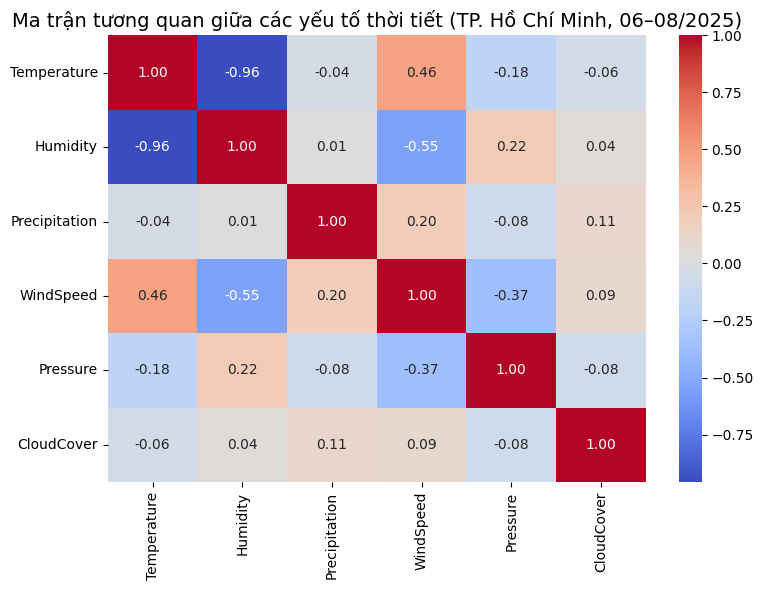

In [20]:
import sys
!{sys.executable} -m pip install seaborn


import seaborn as sns

plt.figure(figsize=(8,6))
corr = weather[["Temperature","Humidity","Precipitation","WindSpeed","Pressure","CloudCover"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Ma trận tương quan giữa các yếu tố thời tiết (TP. Hồ Chí Minh, 06–08/2025)", fontsize=14)
plt.tight_layout(); plt.show()


Ma trận tương quan cho thấy mối liên hệ giữa các biến khí tượng. Nhiệt độ và độ ẩm có mối tương quan âm rất mạnh (r = -0.96), trong khi tốc độ gió có tương quan dương vừa phải với nhiệt độ (r = 0.46). Lượng mưa và mây có tương quan yếu với các yếu tố khác, cho thấy chúng bị ảnh hưởng bởi nhiều điều kiện khác nhau. Nhìn chung, ma trận phản ánh đặc điểm khí hậu ổn định: nhiệt độ tăng thường đi kèm độ ẩm giảm và tốc độ gió tăng, phù hợp với đặc trưng khí hậu nhiệt đới ẩm.

========== BIỂU ĐỒ TỐC ĐỘ GIÓ ==========

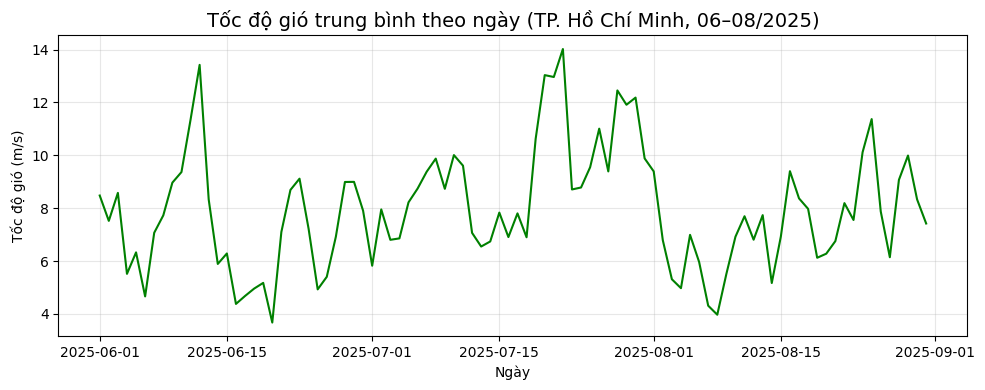

In [22]:
plt.figure(figsize=(10,4))
plt.plot(daily.index, daily["WindSpeed"], color="green")
plt.title("Tốc độ gió trung bình theo ngày (TP. Hồ Chí Minh, 06–08/2025)", fontsize=14)
plt.xlabel("Ngày"); plt.ylabel("Tốc độ gió (m/s)")
plt.grid(alpha=0.3)
plt.tight_layout(); plt.show()


Biểu đồ cho thấy tốc độ gió trung bình dao động trong khoảng 4–14 m/s. Gió tăng mạnh vào một số thời điểm giữa tháng 6 và tháng 8, trùng với thời kỳ mưa lớn hoặc chuyển mùa. Các dao động gió thể hiện ảnh hưởng của áp thấp nhiệt đới và sự thay đổi hướng gió mùa Tây Nam trong khu vực. Nhìn chung, tốc độ gió duy trì ở mức vừa phải, đóng vai trò điều hòa nhiệt độ và hỗ trợ phát tán hơi nước trong khí quyển.

========== BIỂU ĐỒ ÁP SUẤT VÀ MỨC ĐỘ MÂY ==========

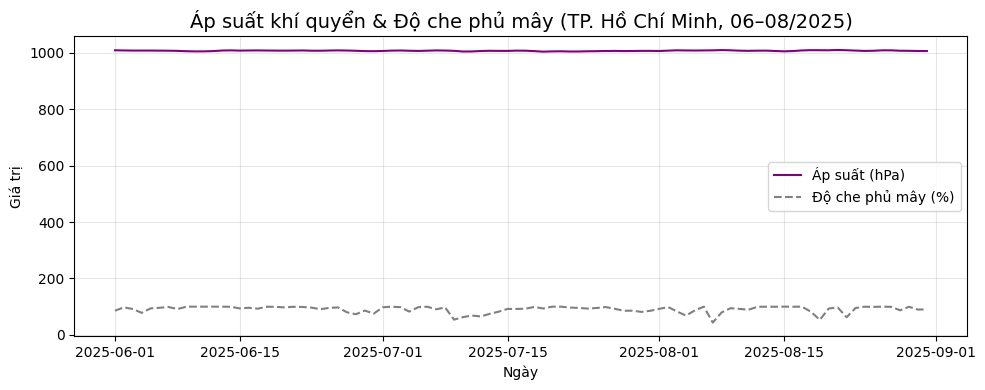

In [23]:
plt.figure(figsize=(10,4))
plt.plot(daily.index, daily["Pressure"], color="purple", label="Áp suất (hPa)")
plt.plot(daily.index, daily["Cloud"], color="gray", linestyle="--", label="Độ che phủ mây (%)")
plt.title("Áp suất khí quyển & Độ che phủ mây (TP. Hồ Chí Minh, 06–08/2025)", fontsize=14)
plt.xlabel("Ngày"); plt.ylabel("Giá trị")
plt.legend(); plt.grid(alpha=0.3); plt.tight_layout(); plt.show()


Biểu đồ thể hiện sự biến động của áp suất khí quyển (đường tím) và độ che phủ mây (đường xám) theo thời gian. Áp suất khí quyển hầu như ổn định quanh mức 1005–1010 hPa, chứng tỏ không có hiện tượng thời tiết cực đoan. Độ che phủ mây dao động trong khoảng 70–100%, cho thấy bầu trời thường xuyên có mây trong suốt mùa mưa. Sự ổn định của áp suất cùng mức độ mây cao thể hiện điều kiện khí quyển ổn định, đặc trưng của khu vực nhiệt đới ẩm giai đoạn giữa năm.